<a href="https://colab.research.google.com/github/slmsshk/Data_Science-_Dummy/blob/main/Decision_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

load_breast_cancer(*, return_X_y=False, as_frame=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including columns with
        appropriate dtypes (numeric). The target is
        a pandas DataFrame or Series depending on the number of target columns.
        If `return_X_y` is True, then (`data`, `target`) will be pandas
        DataFrames or Series as described below.
    
        .. versionadded:: 0.23
    
    Returns
    -------
    data : :class:`~sklearn.utils.Bunch`
        Dictionary-like object, with the following attributes.
    
        data : {ndarray, dataframe} of shape (569, 30)
            The data matrix. If `as_frame=True`, `data` will be a pandas
            DataFrame.
        target: {ndarray, Series} of shape (569,)
            The classification target. If `as_frame=True`, `target` will be
            a pandas Series.
        feature_names: list
            The names of the dataset columns.
        target_names: list
            The names of target classes.
        frame: DataFrame of shape (569, 31)
            Only present when `as_frame=True`. DataFrame with `data` and
            `target`.
    
            .. versionadded:: 0.23
        DESCR: str
            The full description of the dataset.
        filename: str
            The path to the location of the data.
    
            .. versionadded:: 0.20
    
    (data, target) : tuple if ``return_X_y`` is True
    
        .. versionadded:: 0.18
    
    The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
    downloaded from:
    https://goo.gl/U2Uwz2
    
    Examples
    --------
    Let's say you are interested in the samples 10, 50, and 85, and want to
    know their class name.
    
    >>> from sklearn.datasets import load_breast_cancer
    >>> data = load_breast_cancer()
    >>> data.target[[10, 50, 85]]
    array([0, 1, 0])
    >>> list(data.target_names)
    ['malignant', 'benign']


In [ ]:
x,y=load_breast_cancer(return_X_y=True, as_frame=False) 

In [ ]:
feature_names=load_breast_cancer(return_X_y=False, as_frame=False).feature_names
# dir(feature_names)
feature_names[1]

'mean texture'

In [ ]:
x_tr,x_t,y_tr,y_t=train_test_split(x,y)
x_tr.shape

(426, 30)

In [ ]:
y_tr.shape

(426,)

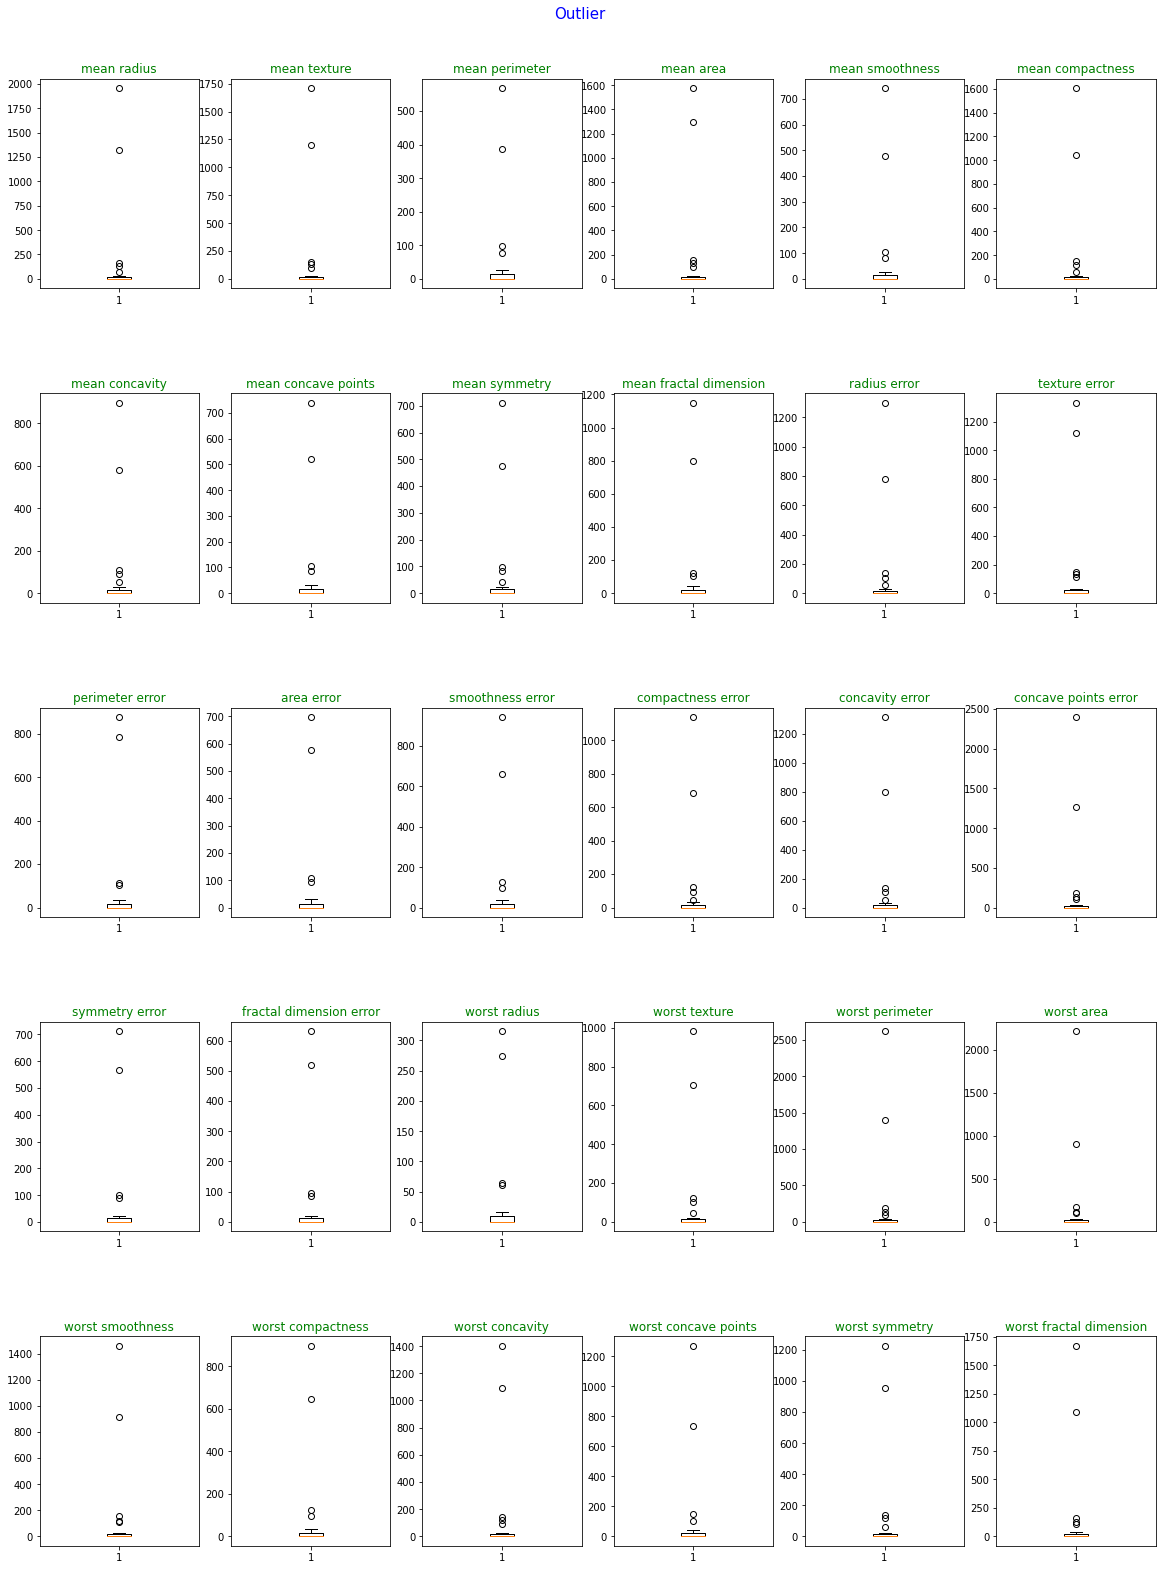

In [ ]:
# Box Plot
plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=.5, top=0.94)

fly={}
for i in range(1,31):
  plt.subplot(5,6,i)
  plt.title(feature_names[i-1],color='green')
  plt.suptitle("Outlier", fontsize=15,color='blue')
  box=plt.boxplot(x[i],showfliers=True)
  fly[feature_names[i-1]]=[item.get_ydata() for item in box['fliers']]
  


In [ ]:
fly

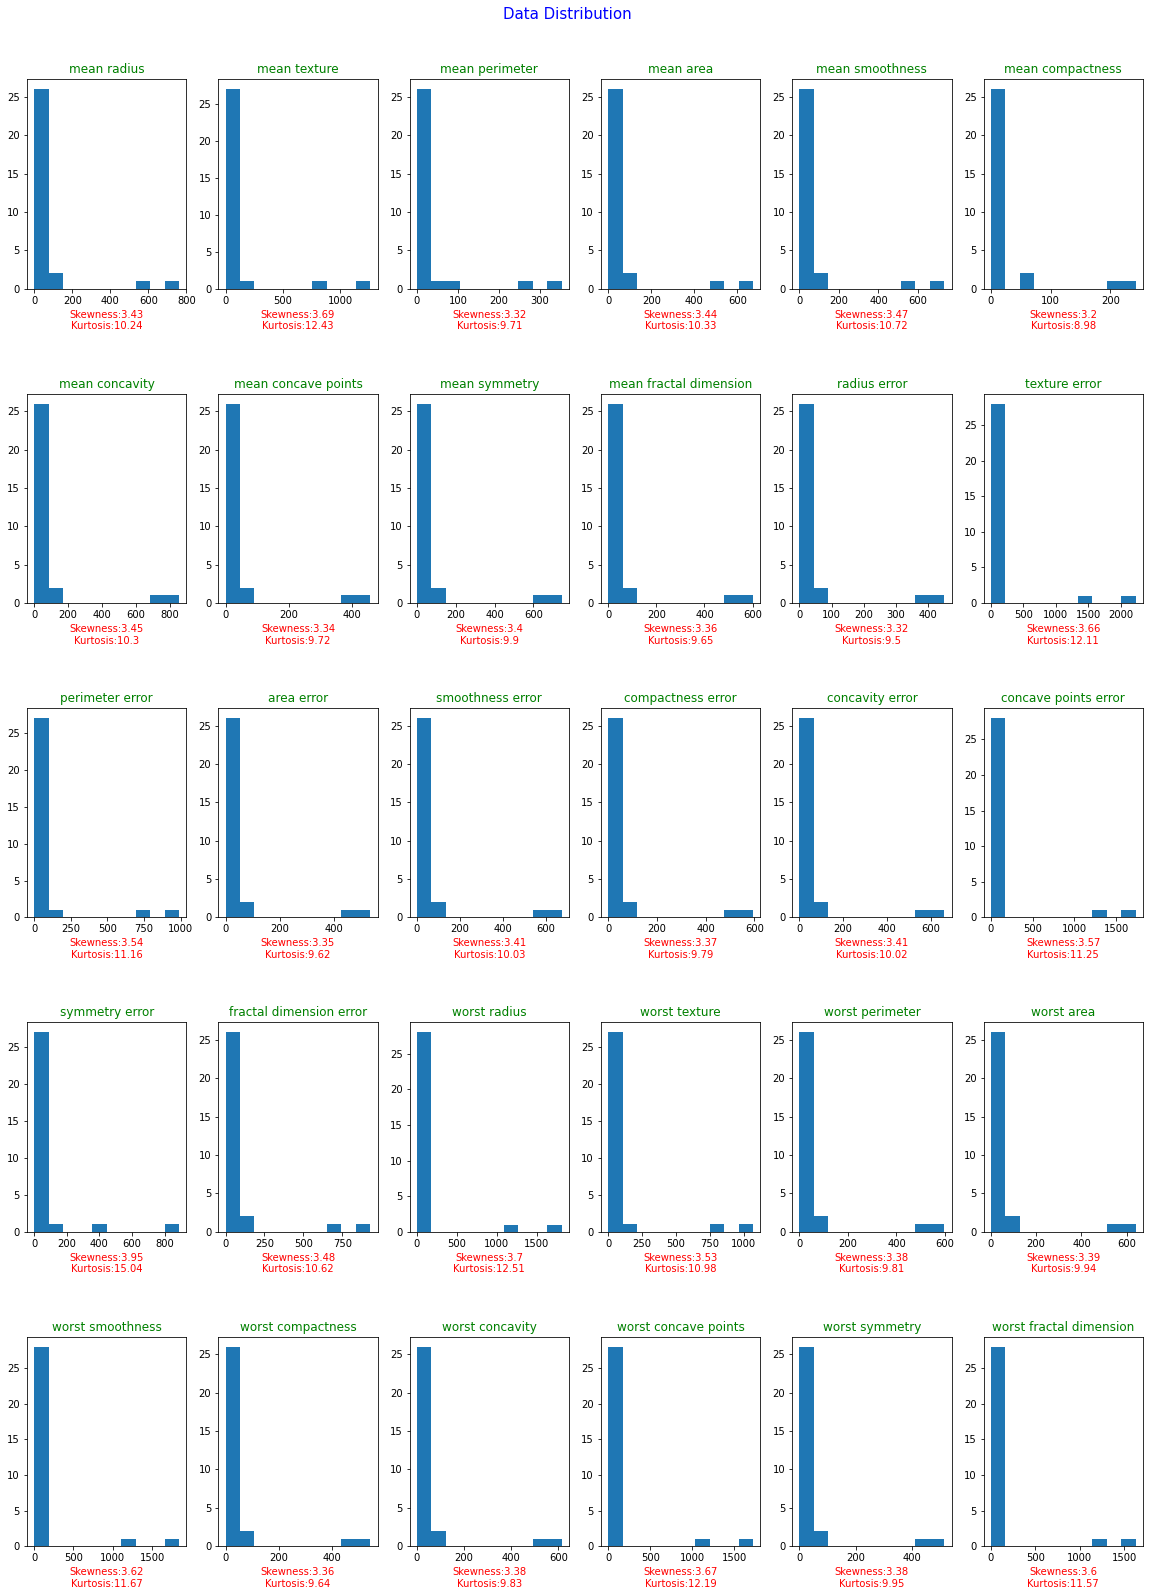

In [ ]:
from scipy.stats import skew,kurtosis

plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=.5, top=0.94)

for i in range(1,31):
  plt.subplot(5,6,i)
  plt.title(feature_names[i-1],color='green')
  plt.suptitle("Data Distribution", fontsize=15,color='blue')
  plt.hist(x[i])
  sk=f'Skewness:{round(skew(x[i]),2)}\nKurtosis:{round(kurtosis(x[i]),2)}'
  plt.xlabel(sk,color='r')



In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=40)
dtc.fit(x_tr,y_tr)
pred=dtc.predict(x_t)

In [ ]:
print(classification_report(y_t,pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.94      0.99      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



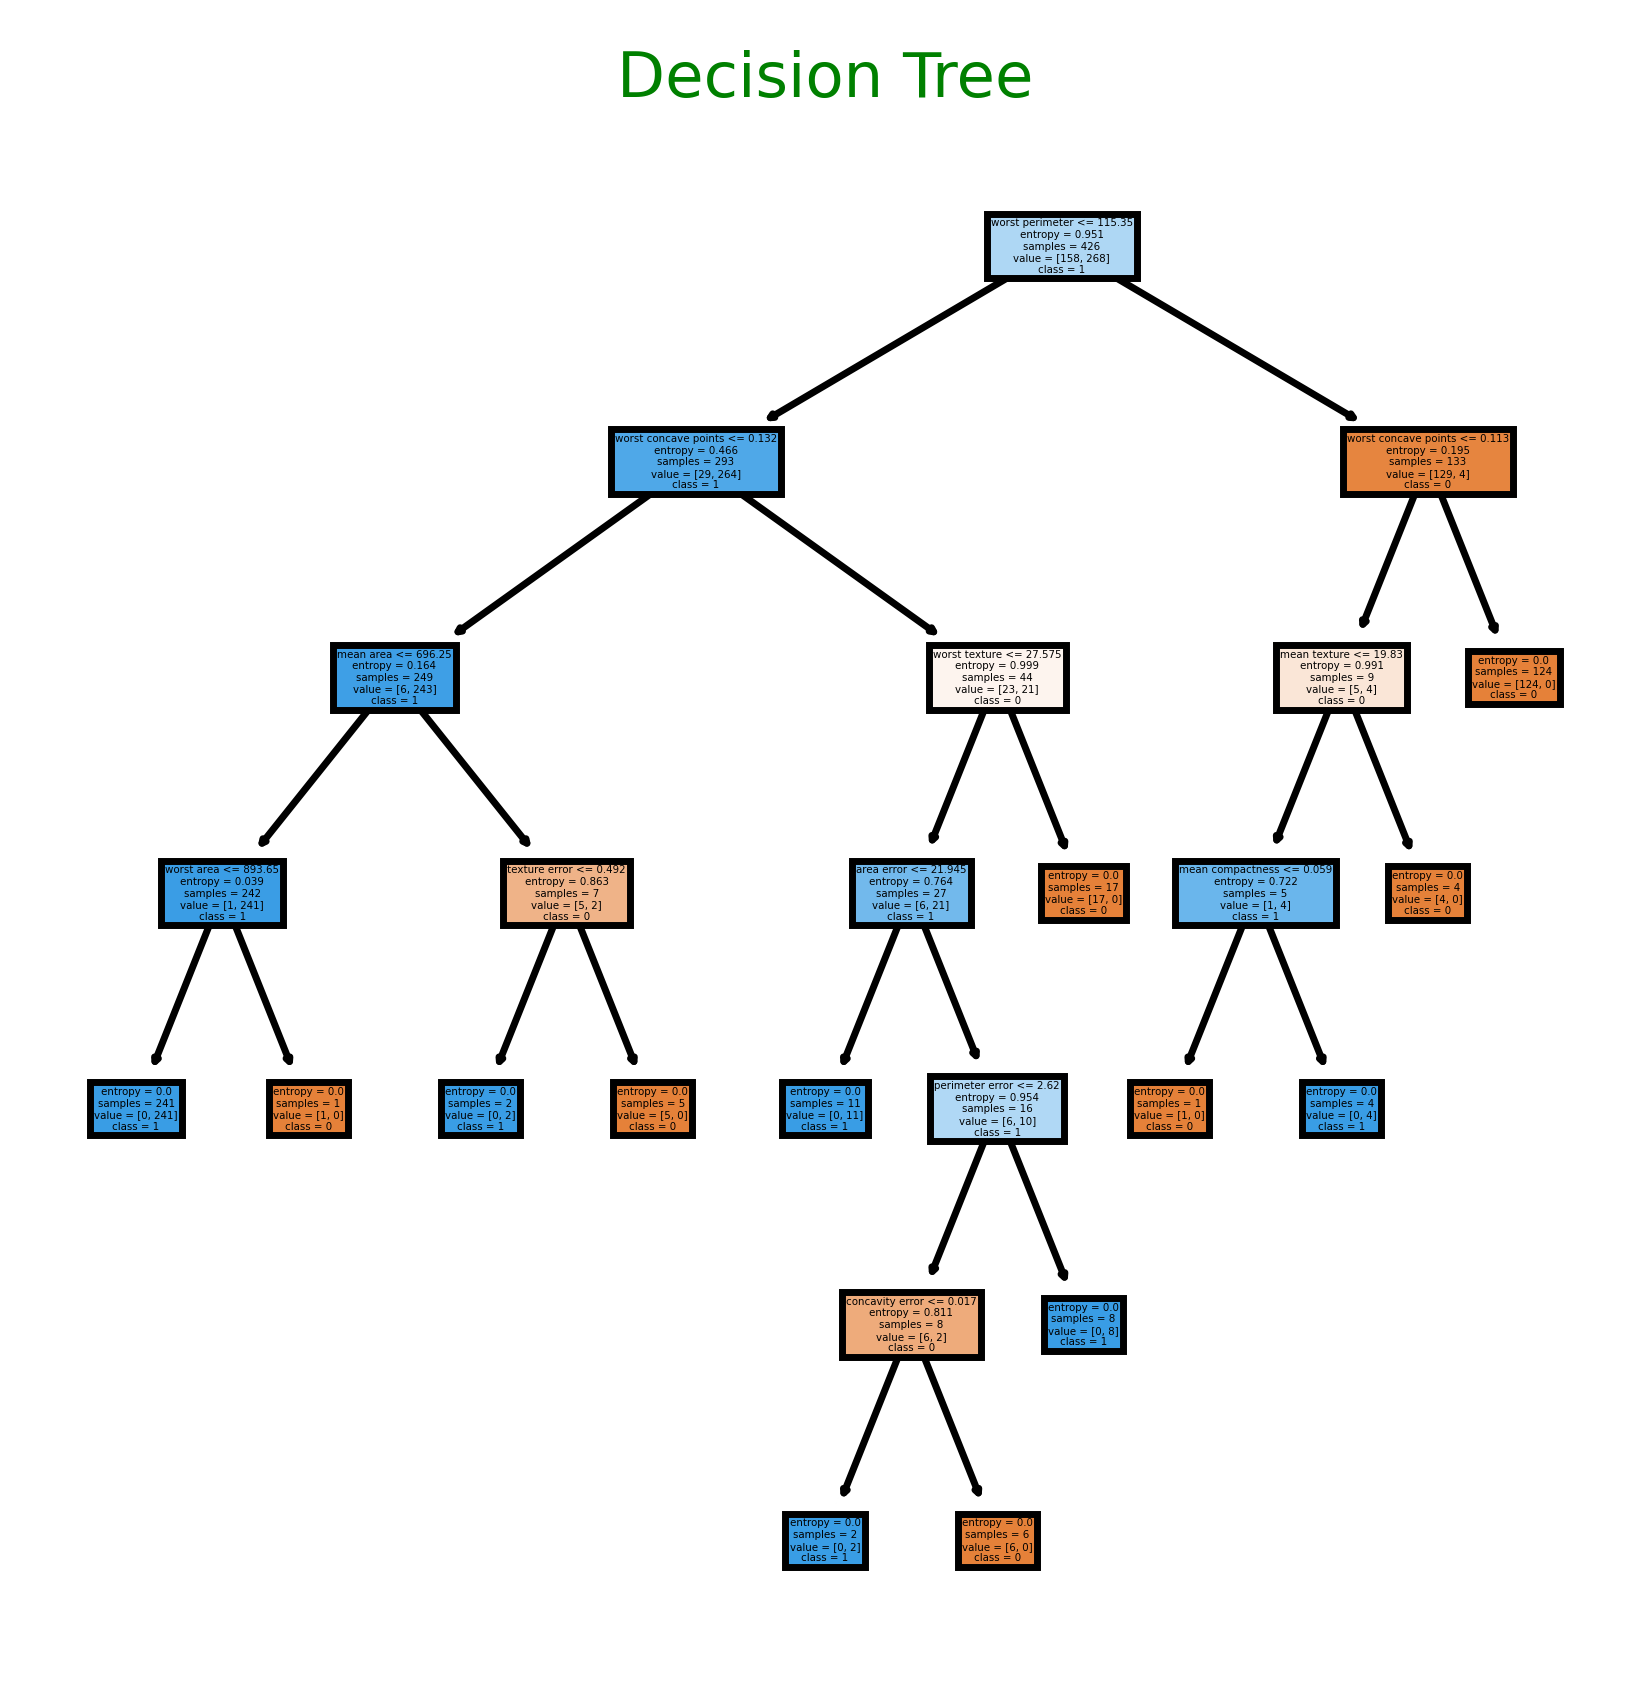

In [ ]:

fn=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target']
cn=['0','1']    #.value_count.keys

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(dtc,feature_names=fn,class_names=cn,filled = True)
plt.title('Decision Tree',color='green',fontsize=9)
plt.show()

# .

In [ ]:
bc=load_breast_cancer(as_frame=True).frame
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
bc['mean area'].value_counts()

512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: mean area, Length: 539, dtype: int64

In [ ]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
bc['mean area']= label_encoder.fit_transform(bc['mean area']) 

In [ ]:
bc['mean area'].value_counts()

234    3
462    2
298    2
111    2
334    2
      ..
227    1
321    1
183    1
146    1
3      1
Name: mean area, Length: 539, dtype: int64

In [ ]:
x=bc.iloc[:,0:4]
y=bc['mean area']

In [ ]:
bc['mean area'].unique()

array([452, 513, 487,  95, 506, 200, 458, 293, 243, 196, 404, 399, 471,
       401, 294, 348, 365, 405, 498, 283, 244,  28, 376, 519, 428, 429,
       338, 467, 388, 441, 465, 157, 426, 480, 409, 422, 330, 246, 374,
       276, 280,  82, 469, 264, 253, 463,   4, 254, 169, 277, 144, 287,
       155, 457, 380, 125, 477, 346, 249,   9,  50,   8, 339,  21, 219,
       354,  24, 105,  19, 221, 472,  14, 435, 299, 194, 414, 453, 495,
       225, 112, 534, 473, 162, 462, 341, 188, 343, 350, 386, 269, 272,
       377, 500, 171,  42, 129, 335, 298,   0, 177,  44,  63, 251, 128,
       190, 525, 108,  39, 204, 328,  61,  11, 156,  16, 364, 400, 445,
       117, 464, 532, 333, 271, 304, 289, 474, 359, 485, 174, 393, 410,
       396, 140, 111, 361,  93,  35, 411, 110, 234,  71, 152, 149, 371,
       332, 301, 242,   5,  45,  91, 260, 178, 442, 423, 168,  80, 135,
       479, 490, 186, 530, 372,  72, 424, 446, 367, 184, 281, 389,  84,
        70,  10,  46, 417, 248, 231, 536, 510, 397, 113, 378,  5

In [ ]:
bc['mean area'].value_counts()

234    3
462    2
298    2
111    2
334    2
      ..
227    1
321    1
183    1
146    1
3      1
Name: mean area, Length: 539, dtype: int64

In [ ]:
bc.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
colnames = list(bc.columns)
colnames

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model

DecisionTreeClassifier(max_depth=3)

In [ ]:
#PLot the decision tree
from sklearn import tree
plt.figure(figsize=(15,15),dpi=1024)
tree.plot_tree(model);

In [ ]:
y_train.value_counts().keys()

Int64Index([234, 500, 136, 382, 149, 276, 201,  84, 105, 334,
            ...
            476, 465, 331,  40, 150, 379, 443,  57, 467, 324],
           dtype='int64', length=434)

In [ ]:
import matplotlib.pyplot as plt




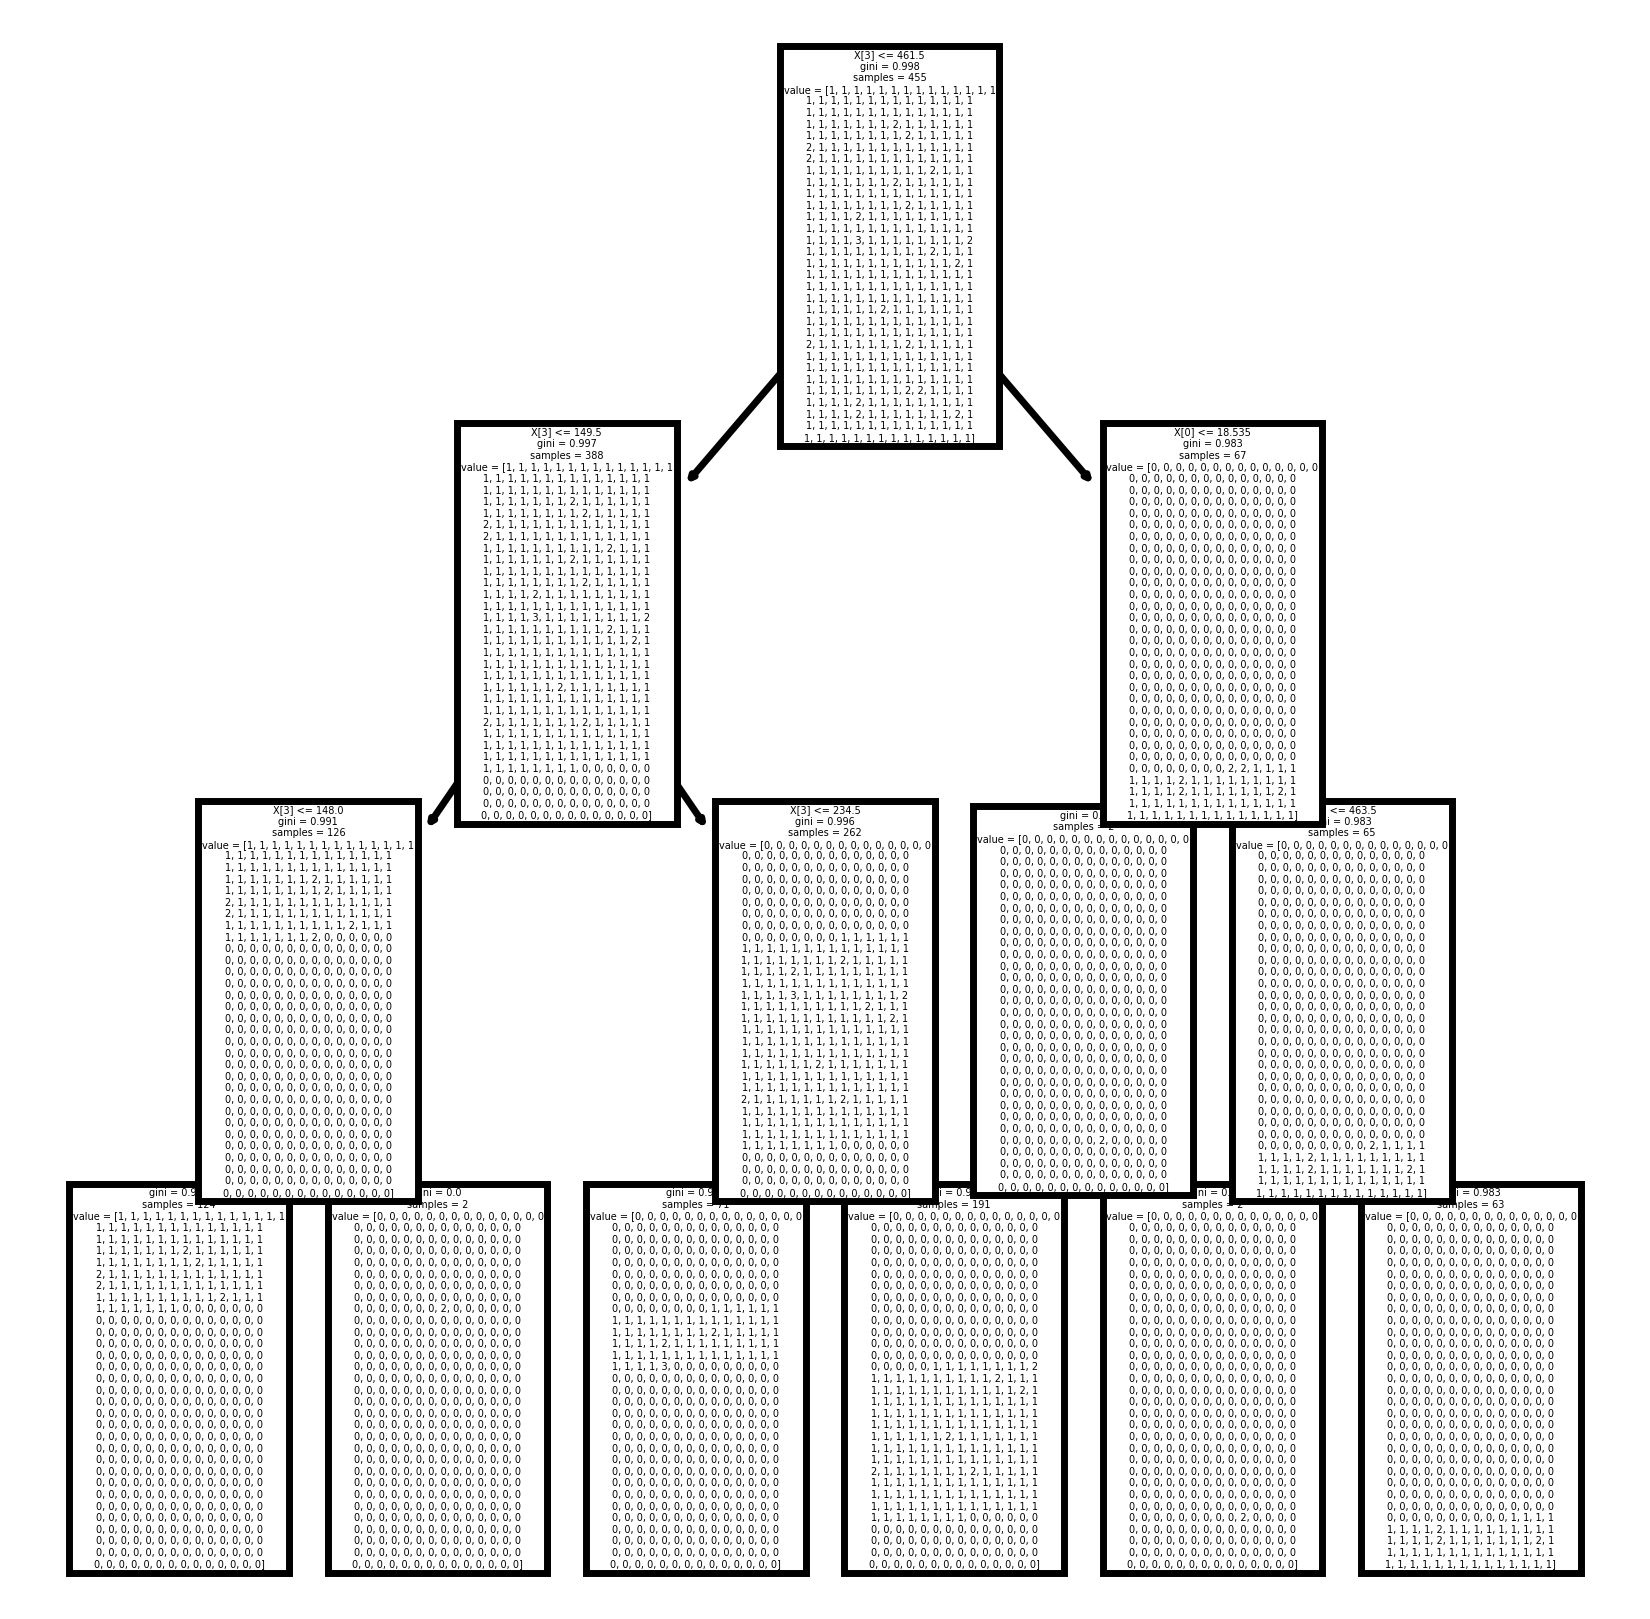

In [ ]:
fn=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target']
cn=[0,1]    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model)
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

In [ ]:
y_test.value_counts()

In [ ]:
preds

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

In [ ]:
preds,y_test

In [ ]:
# Accuracy 
from sklearn.metrics import accuracy_score

np.mean(preds==y_test),accuracy_score(y_test,preds)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = bc.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

In [ ]:
#Find the accuracy
model.score(X_test,y_test)